In [74]:
###Importing Modules
from statsbombpy import sb
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import matplotlib.patches as mpatches
from functools import reduce
import plotly.graph_objects as px
import plotly.express as px
import matplotlib.patches as patches
import plotly.figure_factory as ff
import plotly.graph_objs as go
import warnings
from plotly.validators.scatter.marker import SymbolValidator
import chart_studio.plotly as py
import chart_studio.tools as tls
import chart_studio
import math
import matplotlib.image as mpimg 
from plotly.subplots import make_subplots
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from urllib.request import urlopen

from PIL import Image
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch
from mplsoccer.utils import add_image
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

In [41]:
#get list of match ids for each england game in the tournament
#sb.competitions()
euro_matches = sb.matches(competition_id=53, season_id=106)
#print(euro_matches)
england_euro_matches_df = euro_matches[(euro_matches.home_team == "England Women's") | (euro_matches.away_team == "England Women's")]
matchid_list = england_euro_matches_df["match_id"].tolist()
#print(matchid_list)

#create empty dataframe with same structure as statsbomb events data
events_df = sb.events(match_id=3749052)
events_df = events_df[0:0] 
#print(events_df)
#loop through all match ids for the tournament to gather event data for every game into one dataframe
for i in matchid_list:
    e_df = sb.events(match_id=i)
    events_df = events_df.append(e_df)

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


In [42]:
eurofinal_df = sb.events(match_id=3847567)

credentials were not supplied. open data access only


In [43]:
def get_angle_counts(pass_df):
    #convert radians to degrees
    pass_df['pass_angle_degrees'] = pass_df['pass_angle'].astype(float).apply(math.degrees)
    pass_df['pass_angle_degrees'] %= 360 
    pass_df.sort_values(by='pass_angle_degrees', inplace=True, ascending=True)
    #12 equally ranged bins
    bins = [-np.inf, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
    labels=[15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
    pass_df["angle_bucket"] = pd.cut(pass_df['pass_angle_degrees'], bins=bins, labels=labels)
    pass_df['angle_bucket'] = pass_df['angle_bucket'].astype("string")
    angles_df = pass_df[['angle_bucket']]
    #print(angles_df)
    angles_df = angles_df.value_counts().to_frame('Count').reset_index()
    #print(angles_df)
    angles_df['angle_bucket'] = angles_df['angle_bucket'].astype(int)

    #add rows if there were zero passes at that angle
    if 15 not in angles_df['angle_bucket'].values:
        row_15 = {'angle_bucket':15, 'Count':0}
        angles_df = angles_df.append(row_15, ignore_index=True)
    if 45 not in angles_df['angle_bucket'].values:
        row_45 = {'angle_bucket':45, 'Count':0}
        angles_df = angles_df.append(row_45, ignore_index=True)
    if 75 not in angles_df['angle_bucket'].values:
        row_75 = {'angle_bucket':75, 'Count':0}
        angles_df = angles_df.append(row_75, ignore_index=True)
    if 105 not in angles_df['angle_bucket'].values:
        row_105 = {'angle_bucket':105, 'Count':0}
        angles_df = angles_df.append(row_105, ignore_index=True)
    if 135 not in angles_df['angle_bucket'].values:
        row_135 = {'angle_bucket':135, 'Count':0}
        angles_df = angles_df.append(row_135, ignore_index=True)
    if 165 not in angles_df['angle_bucket'].values:
        row_165 = {'angle_bucket':165, 'Count':0}
        angles_df = angles_df.append(row_165, ignore_index=True)
    if 195 not in angles_df['angle_bucket'].values:
        row_195 = {'angle_bucket':195, 'Count':0}
        angles_df = angles_df.append(row_195, ignore_index=True)
    if 225 not in angles_df['angle_bucket'].values:
        row_225 = {'angle_bucket':225, 'Count':0}
        angles_df = angles_df.append(row_225, ignore_index=True)
    if 255 not in angles_df['angle_bucket'].values:
        row_255 = {'angle_bucket':255, 'Count':0}
        angles_df = angles_df.append(row_255, ignore_index=True)
    if 285 not in angles_df['angle_bucket'].values:
        row_285 = {'angle_bucket':285, 'Count':0}
        angles_df = angles_df.append(row_285, ignore_index=True)
    if 315 not in angles_df['angle_bucket'].values:
        row_315 = {'angle_bucket':315, 'Count':0}
        angles_df = angles_df.append(row_315, ignore_index=True)
    if 345 not in angles_df['angle_bucket'].values:
        row_345 = {'angle_bucket':345, 'Count':0}
        angles_df = angles_df.append(row_345, ignore_index=True)
    
    #return dataframe with count of buckets
    angles_df.sort_values(by='angle_bucket', inplace=True, ascending=True)
    return angles_df

In [44]:
kw_passes_df = events_df[(events_df.type == "Pass") & (events_df.player == "Keira Walsh")]
kw_passes_df = kw_passes_df[kw_passes_df["pass_outcome"].isnull()]
kw_passes_df['x'], kw_passes_df['y'] = zip(*list(kw_passes_df['location'].values))
kw_passes_df['x_end'], kw_passes_df['y_end'] = zip(*list(kw_passes_df['pass_end_location'].values))

kw_pressures_df = events_df[(events_df.type == "Pressure") & (events_df.player == "Keira Walsh")]
kw_pressures_df['x'], kw_pressures_df['y'] = zip(*list(kw_pressures_df['location'].values))

In [45]:
pd.options.mode.chained_assignment = None

kw_result = get_angle_counts(kw_passes_df)
kw_angles = kw_result["angle_bucket"]
kw_count = kw_result["Count"]

markercolor = ["#0C418C", "#0C418C", "#0C418C", "#F0D339", "#F0D339", "#F0D339", "#56A18F", "#56A18F", "#56A18F", "#DC3912", "#DC3912", "#DC3912"]
hover_data = ["0-30", "30-60", "60-90", "90-120", "120-150", "150-180", "180-210", "210-240", "240-270", "270-300", "300-330", "330-360"]

fig = go.Figure(data=
    go.Barpolar(
        r = kw_count,
        theta = kw_angles,
        width=30, 
        marker_color=markercolor, 
        hovertext=hover_data
    ))

fig.update_layout(
    title="<b>Keira Walsh Euro 2022: Pass Direction<b>",
    font=dict(
        size=18
    )
    )

#https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80
fig.add_annotation(
    showarrow=False,
    text="Data Source: <a href='https://statsbomb.com/what-we-do/hub/free-data/'>Statsbomb Open Data</a>",
    x = 0
    , y = -0.15
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=12, color="grey")
    , align="left"
    )

fig.add_annotation(
    showarrow=False,
    text="Created by <a href='https://medium.com/@stuckintherondo'>@stuckintherondo</a>",
    x = 0
    , y = -0.10
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=12, color="grey")
    , align="left"
    )

fig.update_layout(showlegend=False)
#fig.update_polars(angularaxis_showticklabels=False)
#fig.update_polars(radialaxis_showticklabels=False)
fig.update_polars(angularaxis_tickfont_size=12)
fig.update_polars(radialaxis_tickfont_size=12)
fig.update_polars(angularaxis_direction="clockwise")
fig.show()
#py.plot(fig, filename="inv_cole_direction", auto_open = True)

In [46]:
kw_count_passes_df = kw_passes_df[['pass_recipient']]
kw_count_passes_df = kw_count_passes_df.value_counts().to_frame('Count').reset_index()
print(kw_count_passes_df)

          pass_recipient  Count
0        Leah Williamson     64
1            Lucy Bronze     41
2          Millie Bright     37
3        Georgia Stanway     28
4            Lauren Hemp     27
5            Rachel Daly     27
6             Ella Toone     19
7        Francesca Kirby     19
8           Bethany Mead     18
9         Alex Greenwood     12
10           Chloe Kelly      9
11           Ellen White      7
12         Alessia Russo      4
13  Mary Alexandra Earps      3
14            Jill Scott      1


In [47]:

#pass_recipient, pass_body_part, pass_length

#12 equally ranged bins
bins = [-np.inf, 15, 30, +np.inf]
labels=["Short", "Medium", "Long"]
kw_passes_df['Pass Length'] = pd.cut(kw_passes_df['pass_length'], bins=bins, labels=labels)
kw_passes_df['Pass Length'] = kw_passes_df['Pass Length'].astype("string")
kw_passes_length_df = kw_passes_df[['pass_recipient', 'Pass Length']]
kw_passes_length_df = kw_passes_length_df.groupby(["pass_recipient", "Pass Length"]).size().reset_index(name="Count")

kw_count_passes_df = kw_passes_df[['pass_recipient']]
kw_count_passes_df = kw_count_passes_df.value_counts().to_frame('Count').reset_index()
most_passes_rec = kw_count_passes_df["pass_recipient"].tolist()
kw_passes_length_df.sort_values(by='Pass Length', inplace=True, ascending=False)

#create bar plot
fig = px.bar(kw_passes_length_df, x="pass_recipient", y="Count", color="Pass Length", color_discrete_sequence=["red", "green", "blue"], title="Keira Walsh Pass Length by Pass Recipient")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

#fig = px.sunburst(kw_passes_df, path=['pass_body_part', 'Pass Length'], values='pass_recipient')
#fig.show()

In [15]:
kw_count_passes_df = kw_passes_df[['pass_switch']]
kw_count_passes_df = kw_count_passes_df.value_counts().to_frame('Count').reset_index()
print(kw_count_passes_df)

   pass_switch  Count
0         True     11


In [16]:
kw_count_passes_df = kw_passes_df[['pass_body_part']]
kw_count_passes_df = kw_count_passes_df.value_counts().to_frame('Count').reset_index()
print(kw_count_passes_df)

  pass_body_part  Count
0     Right Foot    269
1      Left Foot     39
2           Head      3


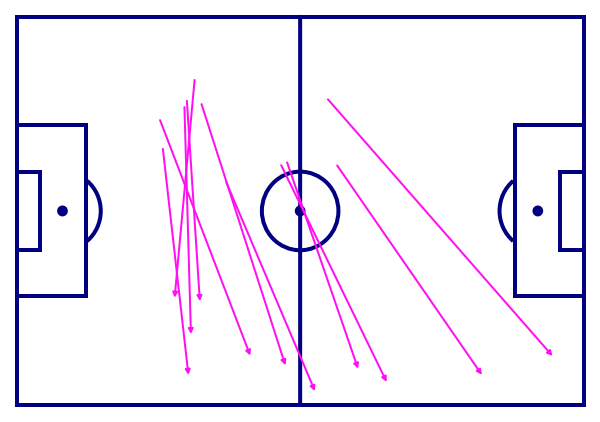

In [17]:
kw_switches_df = kw_passes_df[(kw_passes_df.pass_switch == True)]

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7.5)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
draw_pitch(ax)
plt.gca().invert_yaxis()
plt.axis('off')
ax.patch.set_facecolor('black')
for i in range(len(kw_switches_df)):
        #color = "gold" if modric_se_df.iloc[i]["possession"] in goal_ending_list else "silver"
        
    ax.annotate("", xy = (kw_switches_df.iloc[i]['x_end'], kw_switches_df.iloc[i]['y_end']), xycoords = 'data', 
                xytext = (kw_switches_df.iloc[i]['x'], kw_switches_df.iloc[i]['y']), textcoords = 'data',
            arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",color = "#FF10F0", lw=2),)
plt.show()

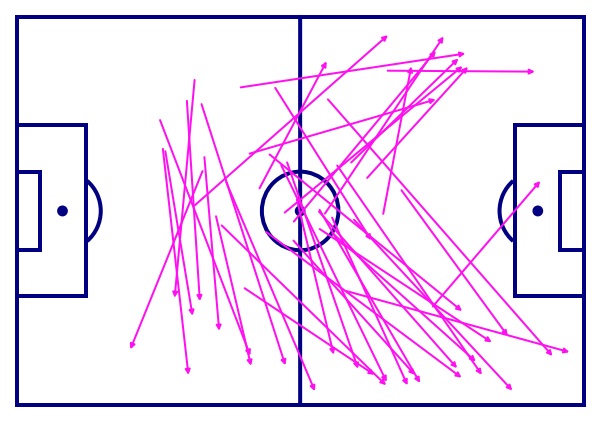

In [18]:
kw_longballs_df = kw_passes_df[(kw_passes_df["Pass Length"] == "Long")]
kw_longballs3_df = kw_longballs_df[(kw_longballs_df["pass_recipient"] == "Bethany Mead") | (kw_longballs_df["pass_recipient"] == "Lauren Hemp") | (kw_longballs_df["pass_recipient"] == "Lucy Bronze")]

#print(kw_longballs_df["pass_recipient"])
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7.5)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
draw_pitch(ax)
plt.gca().invert_yaxis()
plt.axis('off')
ax.patch.set_facecolor('black')
for i in range(len(kw_longballs3_df)):
        color = "gold" if kw_longballs_df.iloc[i]["pass_recipient"]=="Bethany Mead"
        color = "gold" if kw_longballs_df.iloc[i]["pass_recipient"]=="Lucy Bronze"
        color = "gold" if kw_longballs_df.iloc[i]["pass_recipient"]=="Lauren Hemp", else color = "silver"
        
    ax.annotate("", xy = (kw_longballs_df.iloc[i]['x_end'], kw_longballs_df.iloc[i]['y_end']), xycoords = 'data', 
                xytext = (kw_longballs_df.iloc[i]['x'], kw_longballs_df.iloc[i]['y']), textcoords = 'data',
            arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",color = "#FF10F0", lw=2),)
plt.savefig('longballs.png')
plt.show()

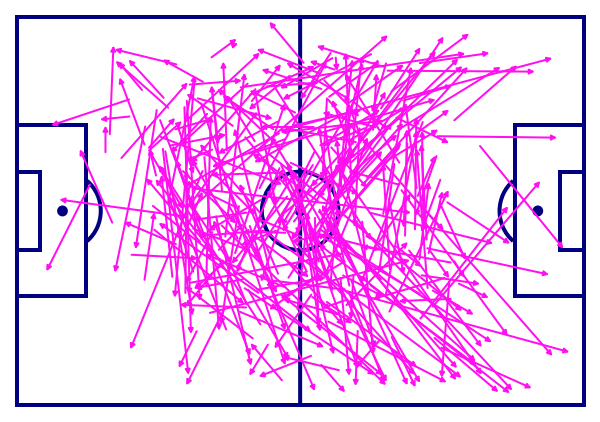

In [19]:
kw_lb_df = kw_passes_df[(kw_passes_df.pass_recipient == "Lucy Bronze")]

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7.5)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
draw_pitch(ax)
plt.gca().invert_yaxis()
plt.axis('off')
ax.patch.set_facecolor('black')
for i in range(len(kw_passes_df)):
        #color = "gold" if modric_se_df.iloc[i]["possession"] in goal_ending_list else "silver"
        
    ax.annotate("", xy = (kw_passes_df.iloc[i]['x_end'], kw_passes_df.iloc[i]['y_end']), xycoords = 'data', 
                xytext = (kw_passes_df.iloc[i]['x'], kw_passes_df.iloc[i]['y']), textcoords = 'data',
            arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",color = "#FF10F0", lw=2),)
plt.show()

In [20]:
kw_count_switches_df = kw_switches_df[['pass_recipient']]
kw_count_switches_df = kw_count_switches_df.value_counts().to_frame('Count').reset_index()
print(kw_count_switches_df)

  pass_recipient  Count
0    Lucy Bronze      9
1    Lauren Hemp      1
2  Millie Bright      1


In [21]:
#12 
bins = [-np.inf, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
labels=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
kw_passes_df["x_bucket"] = pd.cut(kw_passes_df['x'], bins=bins, labels=labels)
kw_passes_df['x_bucket'] = kw_passes_df['x_bucket'].astype("string")

#8
bins = [-np.inf, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
kw_passes_df["y_bucket"] = pd.cut(kw_passes_df['y'], bins=bins, labels=labels)
kw_passes_df['y_bucket'] = kw_passes_df['y_bucket'].astype("string")
kw_pass_zones_df = kw_passes_df[['x_bucket', 'y_bucket']]
kw_pass_zones_df = kw_pass_zones_df.value_counts().to_frame('Count').reset_index() 
#print(ars_count_passes_df)
kw_zone_pivot_df = kw_pass_zones_df.pivot('y_bucket', "x_bucket", "Count")
fig = px.imshow(kw_zone_pivot_df, aspect="Auto", color_continuous_scale='Portland')
fig.update_layout(
    xaxis_title="Recipient",
    yaxis_title="Passer",
    title="<b>Keira Walsh Euro 2022: Pass Locations<b>",
    )
fig.layout.yaxis.type = 'category'
fig.show()
#py.plot(fig, filename="inv_matrix", auto_open = True)

In [22]:
#12 
bins = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
kw_passes_df["x_bucket"] = pd.cut(kw_passes_df['x'], bins=bins, labels=labels)
kw_passes_df['x_bucket'] = kw_passes_df['x_bucket'].astype("string")

#8
bins = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80]
labels=["A", "B", "C", "D", "E", "F", "G", "H"]
kw_passes_df["y_bucket"] = pd.cut(kw_passes_df['y'], bins=bins, labels=labels)
kw_passes_df['y_bucket'] = kw_passes_df['y_bucket'].astype("string")
kw_pass_zones_df = kw_passes_df[['x_bucket', 'y_bucket']]
kw_pass_zones_df = kw_pass_zones_df.value_counts().to_frame('Count').reset_index()
#print(ars_count_passes_df)
kw_zone_pivot_df = kw_pass_zones_df.pivot('y_bucket', "x_bucket", "Count")
kw_zone_pivot_df.insert(0, "A", [0, 0, 0, 0, 0, 0, 0, 0])
kw_zone_pivot_df.insert(10, "K", [0, 0, 0, 0, 0, 0, 0, 0])
kw_zone_pivot_df.insert(11, "L", [0, 0, 0, 0, 0, 0, 0, 0])
kw_zone_pivot_df = kw_zone_pivot_df.fillna(0)
plt.figure(figsize = (120,80))
fig = px.imshow(kw_zone_pivot_df, aspect='equal', color_continuous_scale='BuPu')
#draw_pitch_plotly("#FF00FF", 2)
fig.update_layout(
    xaxis_title="Recipient",
    yaxis_title="Passer",
    title="<b>Keira Walsh Euro 2022: Pass Locations<b>",
    )
fig.layout.yaxis.type = 'category'
fig.add_layout_image(
        dict(
            source="navypitch.png",
            xref="x",
            yref="y",
            x="A",
            y="A",
            sizex=120,
            sizey=80,
            #sizing="stretch",
            opacity=1,
            layer="above")
)

fig.show()
#py.plot(fig, filename="inv_matrix", auto_open = True)

<Figure size 8640x5760 with 0 Axes>

In [23]:
#12 
bins = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
kw_passes_df["x_end_bucket"] = pd.cut(kw_passes_df['x_end'], bins=bins, labels=labels)
kw_passes_df['x_end_bucket'] = kw_passes_df['x_end_bucket'].astype("string")

#8
bins = [-np.inf, 10, 20, 30, 40, 50, 60, 70, 80]
labels=["A", "B", "C", "D", "E", "F", "G", "H"]
kw_passes_df["y_end_bucket"] = pd.cut(kw_passes_df['y_end'], bins=bins, labels=labels)
kw_passes_df['y_end_bucket'] = kw_passes_df['y_end_bucket'].astype("string")
kw_end_zones_df = kw_passes_df[['x_end_bucket', 'y_end_bucket']]
kw_end_zones_df = kw_end_zones_df.value_counts().to_frame('Count').reset_index()
#print(ars_count_passes_df)
kw_end_pivot_df = kw_end_zones_df.pivot('y_end_bucket', "x_end_bucket", "Count")
kw_end_pivot_df = kw_end_pivot_df.fillna(0)
fig = px.imshow(kw_end_pivot_df, aspect='equal', color_continuous_scale='BuPu')
fig.update_layout(
    title="<b>Keira Walsh Euro 2022: Pass End Locations<b>",
    )
fig.layout.yaxis.type = 'category'
 
fig.show()
#py.plot(fig, filename="inv_matrix", auto_open = True)

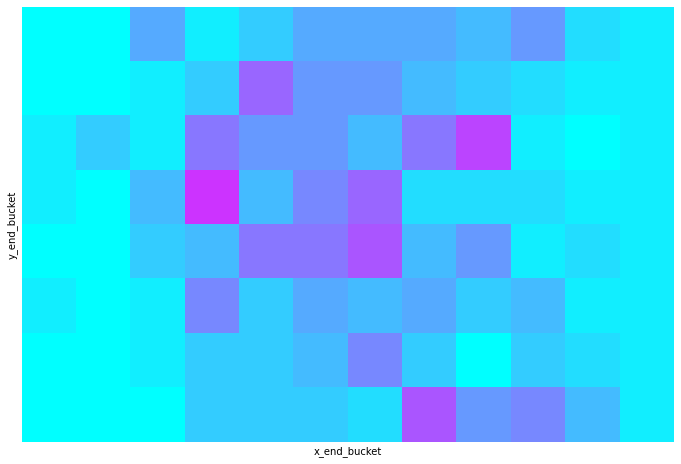

In [24]:
fig=plt.figure()
fig.set_size_inches(12, 8)

#fig, ax = plt.subplots()
#fig.set_size_inches(21, 15)
plt.ylim(0, 80)
plt.xlim(0, 120)
sns.heatmap(kw_end_pivot_df, vmax=15, square=True, cmap='cool', xticklabels=False, yticklabels=False, cbar=False)

#draw_pitch(ax)
plt.savefig('endheatmap.png')
plt.show()


NameError: name 'kw_assist_df' is not defined

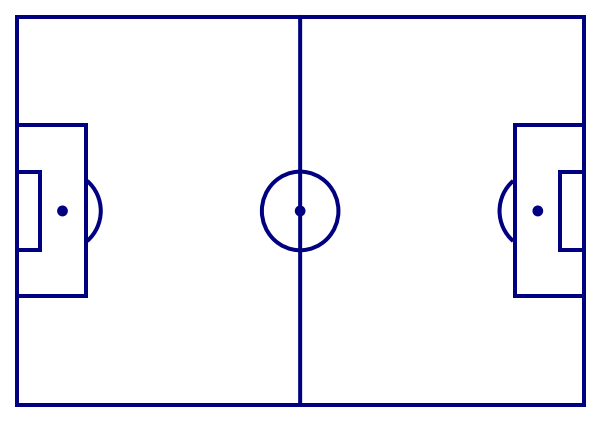

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7.5)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
draw_pitch(ax)
plt.gca().invert_yaxis()
plt.axis('off')
ax.patch.set_facecolor('black')
for i in range(len(kw_assist_df)):
        #color = "gold" if modric_se_df.iloc[i]["possession"] in goal_ending_list else "silver"
        
    ax.annotate("", xy = (kw_assist_df.iloc[i]['x_end'], kw_assist_df.iloc[i]['y_end']), xycoords = 'data', 
                xytext = (kw_assist_df.iloc[i]['x'], kw_assist_df.iloc[i]['y']), textcoords = 'data',
            arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",color = "#FF10F0", lw=2),)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
draw_pitch(ax)
plt.gca().invert_yaxis()
plt.axis('off')
ax.patch.set_facecolor('black')
plt.show()
plt.savefig('navypitch.png')

In [32]:
from mplsoccer.pitch import Pitch

In [27]:
pip install mplsoccer


  Created wheel for mplsoccer: filename=mplsoccer-1.1.3-py3-none-any.whl size=68816 sha256=03013d98a79af527c585c63bd0abae7b30f52739f8b41e818b61cd4b1a0ff11b
  Stored in directory: c:\users\lilyb\appdata\local\pip\cache\wheels\f7\d3\5e\7e7a2beb2c09e3dce75cce3afb786a4193c29a36aa1b5a150d
Successfully built mplsoccer


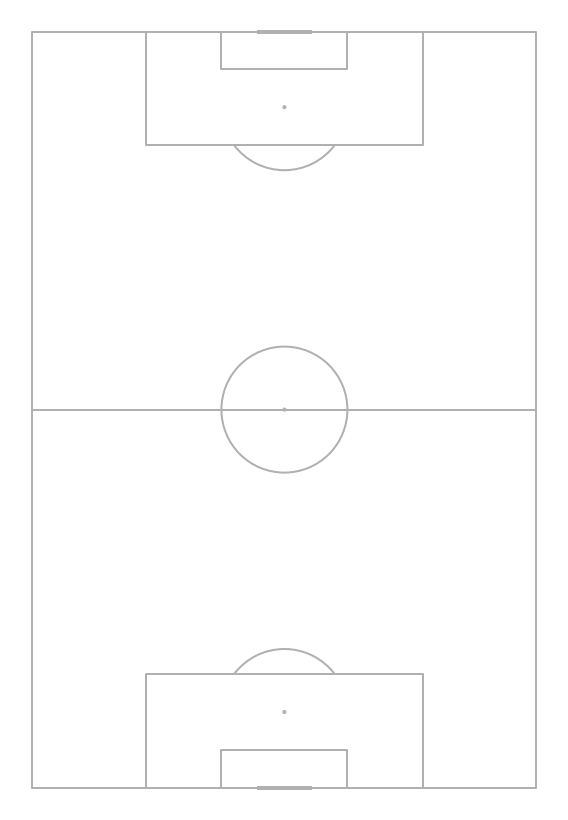

In [39]:
 
pitch = VerticalPitch(half=False)
fig, ax = pitch.draw(figsize=(8, 16))

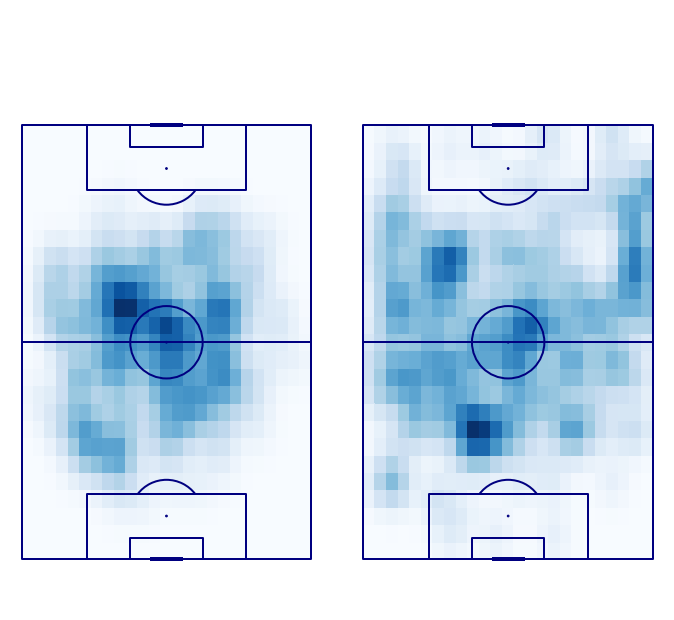

In [73]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000080')
# draw
fig, axs = pitch.grid(ncols=2, axis=False, endnote_height=0.05)
#fig, ax = pitch.draw(nrows=1, ncols=2)
#fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(kw_passes_df['x'], kw_passes_df['y'], statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
heatb4 = pitch.heatmap(bin_statistic, ax=axs['pitch'][0], cmap='Blues')

bin_statistic = pitch.bin_statistic(kw_passes_df['x_end'], kw_passes_df['y_end'], statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
heatafter = pitch.heatmap(bin_statistic, ax=axs['pitch'][1], cmap='Blues')


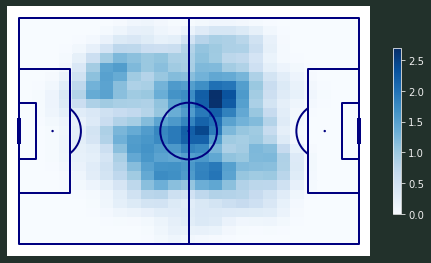

In [68]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='#000080')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(kw_passes_df['x'], kw_passes_df['y'], statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='Blues')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')